In [2]:
import numpy as np
from nilearn import datasets, plotting
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.interfaces.fmriprep import load_confounds
import matplotlib.pyplot as plt


In [14]:
# Load Schaefer atlas
atlas_data = datasets.fetch_atlas_schaefer_2018(n_rois=400)
atlas_filename = atlas_data.maps

# Load fMRI data
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data.func[0]

# Define the masker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, verbose=5, reduced_confounds=False)

 

In [4]:
type(masker)


nilearn.maskers.nifti_labels_masker.NiftiLabelsMasker

In [15]:
# Confound 1: Global Signal Regression
confounds_gsr = load_confounds(fmri_filenames,
                                strategy=['global_signal',"high_pass", "wm_csf"])
# Confound 2: Motion Parameters
confounds_motion = load_confounds(fmri_filenames,strategy=['motion',"high_pass", "wm_csf"], motion= "basic", compcor='anat_combined',n_compcor='all')



In [6]:
data.confounds

['C:\\Users\\prsyu/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv']

In [16]:

time_series_gsr = masker.fit_transform(fmri_filenames, confounds=confounds_gsr[0])
time_series_motion = masker.fit_transform(fmri_filenames, confounds=confounds_motion[0])



[NiftiLabelsMasker.wrapped] loading data from C:\Users\prsyu\nilearn_data\schaefer_2018\Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from C:\Users\prsyu\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.wrapped] loading data from C:\Users\prsyu\nilearn_data\schaefer_2018\Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from C:\Users\prsyu\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


In [17]:
# Calculate connectivity matrices
connectivity_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix_gsr = connectivity_measure.fit_transform([time_series_gsr])[0]
correlation_matrix_motion = connectivity_measure.fit_transform([time_series_motion])[0]


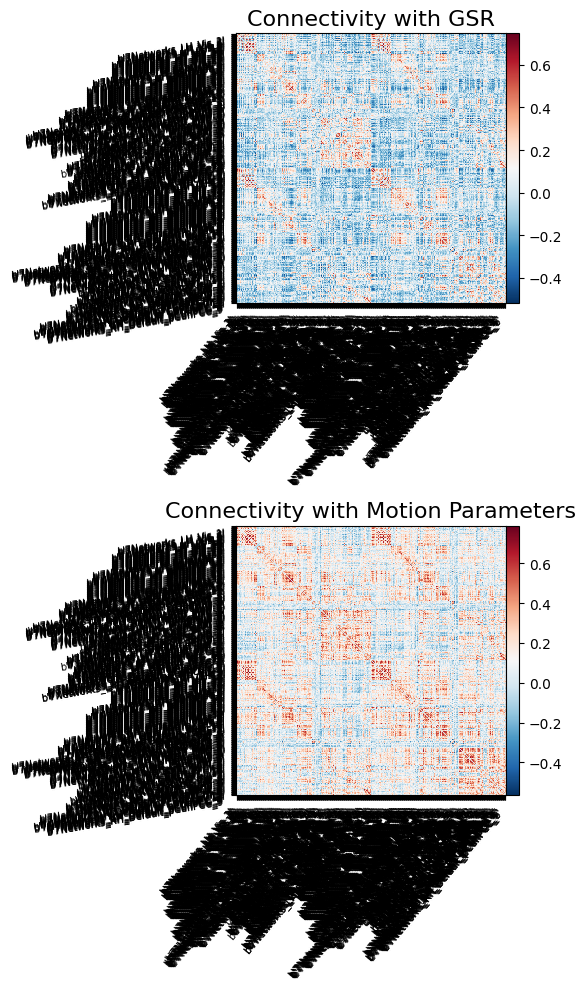

In [18]:

# Zero out the diagonals
np.fill_diagonal(correlation_matrix_gsr, 0)
np.fill_diagonal(correlation_matrix_motion, 0)

# Plotting the correlation matrices
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plotting.plot_matrix(correlation_matrix_gsr, labels=atlas_data.labels, title='Connectivity with GSR', axes=axes[0])
plotting.plot_matrix(correlation_matrix_motion, labels=atlas_data.labels, title='Connectivity with Motion Parameters', axes=axes[1])
plt.show()

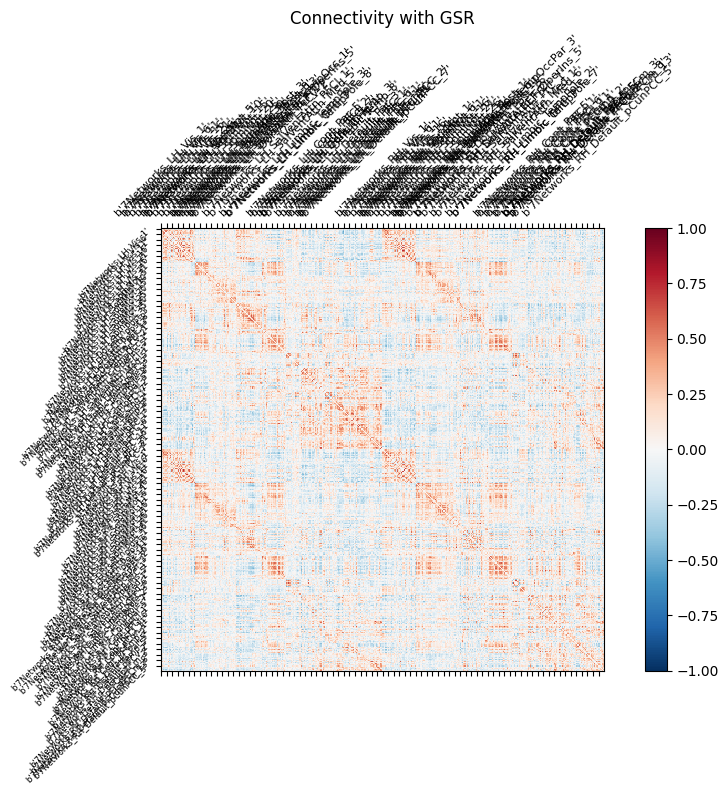

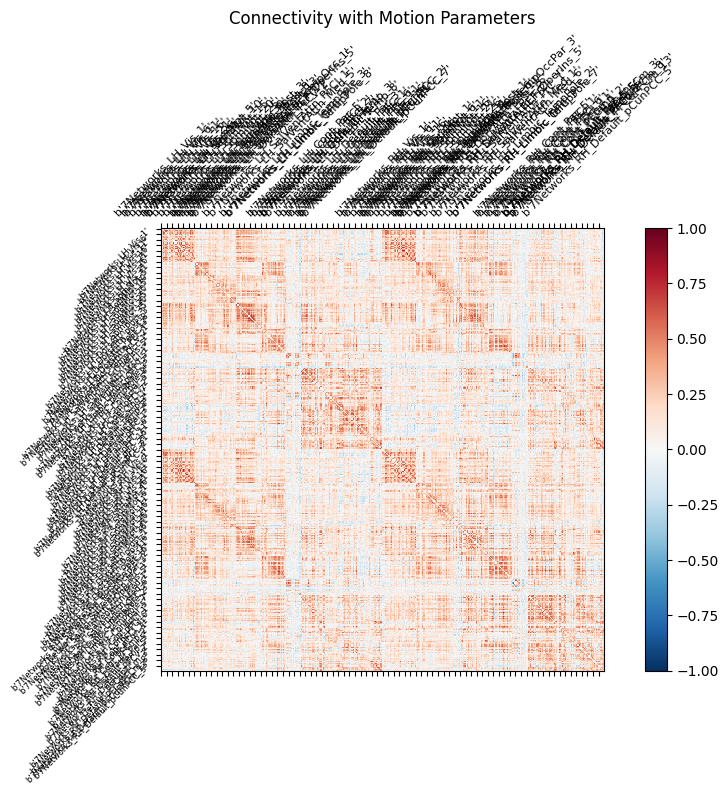

In [21]:
# Define a function to create a plot
def create_plot(matrix, title, labels):
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

    im = ax.matshow(matrix, cmap='RdBu_r', vmin=-1, vmax=1)

    ticks = range(0, len(labels), 5)  # Adjust the step as needed
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels([labels[i] for i in ticks], rotation=45, fontsize=8)  # Adjust the font size as needed
    ax.set_yticklabels([labels[i] for i in ticks],rotation=45, fontsize=6)  # Adjust the font size as needed

    ax.set_title(title)

    fig.colorbar(im)
    plt.tight_layout()
    plt.show()

# Create the first plot
create_plot(correlation_matrix_gsr, 'Connectivity with GSR', atlas_data.labels)

# Create the second plot
create_plot(correlation_matrix_motion, 'Connectivity with Motion Parameters', atlas_data.labels)